# Stock Price Prediction with LSTM, GRU, and RNN Models: A Time Series Analysis of DJIA Companies

### About Dataset

**Contex**t!

The stock market data can be fascinating to analyze, and strong predictive models can lead to significant financial gains. While vast amounts of financial data are available online, finding a large, well-structured dataset covering a wide array of companies can be challenging. In this dataset, historical stock prices for IBM over the last 12 years are provided, totaling 3,019 rows of data.ata.

**Content**  
The data is structured to meet various needs and computational limitations. It includes files containing historical stock data with the following columns:

- **Date**: in the format yy-mm-dd
- **Open**: price of the stock at market open (in USD)
- **High**: highest price reached during the day
- **Low**: lowest price reached during the day
- **Close**: closing price of the stock
- **Volume**: number of shares traded
- **Name**: the stock's tid the financial market.


# Library Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from statsmodels import api as sm
import plotly.subplots as sp
import math
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import SGD

warnings.filterwarnings("ignore")

plt.style.use("fivethirtyeight")

# Dataset Overview

In [3]:
df = pd.read_csv('/kaggle/input/stock-time-series-20050101-to-20171231/IBM_2006-01-01_to_2018-01-01.csv')
df.head() 

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
1,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
3,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
4,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3020 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3020 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3020 non-null   float64
 5   Volume  3020 non-null   int64  
 6   Name    3020 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.3+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3020.000000,3019.000000,3020.000000,3.020000e+03
mean,145.515545,146.681738,144.471597,145.617278,5.773301e+06
std,37.554946,37.613446,37.477641,37.529387,3.192831e+06
min,72.740000,73.940000,69.500000,71.740000,2.542560e+05
25%,116.405000,117.765000,115.490000,116.525000,3.622681e+06
50%,149.610000,150.330000,148.470000,149.315000,4.928852e+06
75%,178.445000,179.762500,177.330000,178.685000,6.965014e+06
max,215.380000,215.900000,214.300000,215.800000,3.077428e+07


In [6]:
print(df.isnull().sum())

Date      0
Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64


In [7]:
df = df.dropna()

print(df.isnull().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64


In [8]:
df["Date"] = pd.to_datetime(df["Date"])

# Seasonal Decomposition

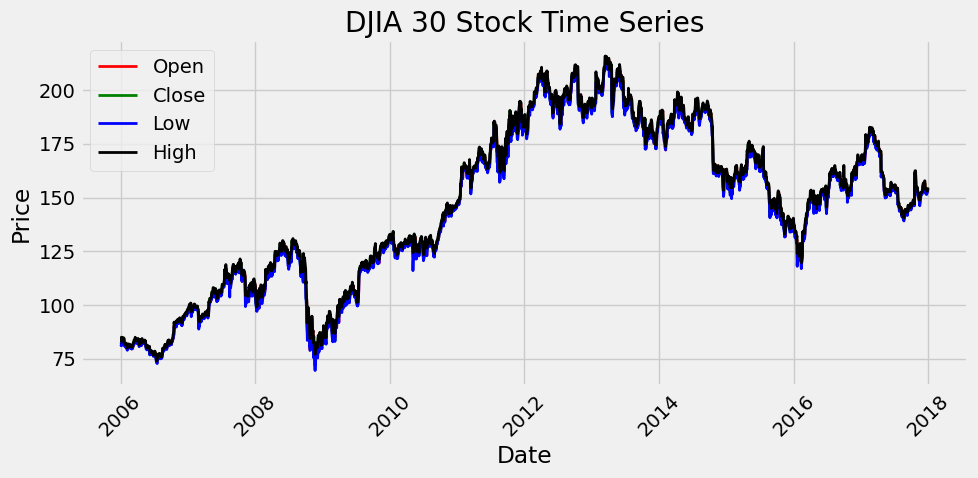

In [9]:
df_IBM = df[df['Name'] == 'IBM']

plt.figure(figsize=(10, 5))
plt.plot(df_IBM['Date'], df_IBM['Open'], color='red', label='Open', linewidth=2)
plt.plot(df_IBM['Date'], df_IBM['Close'], color='green', label='Close', linewidth=2)
plt.plot(df_IBM['Date'], df_IBM['Low'], color='blue', label='Low', linewidth=2)
plt.plot(df_IBM['Date'], df_IBM['High'], color='black', label='High', linewidth=2)

plt.title("DJIA 30 Stock Time Series")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
df.set_index('Date', inplace=True)

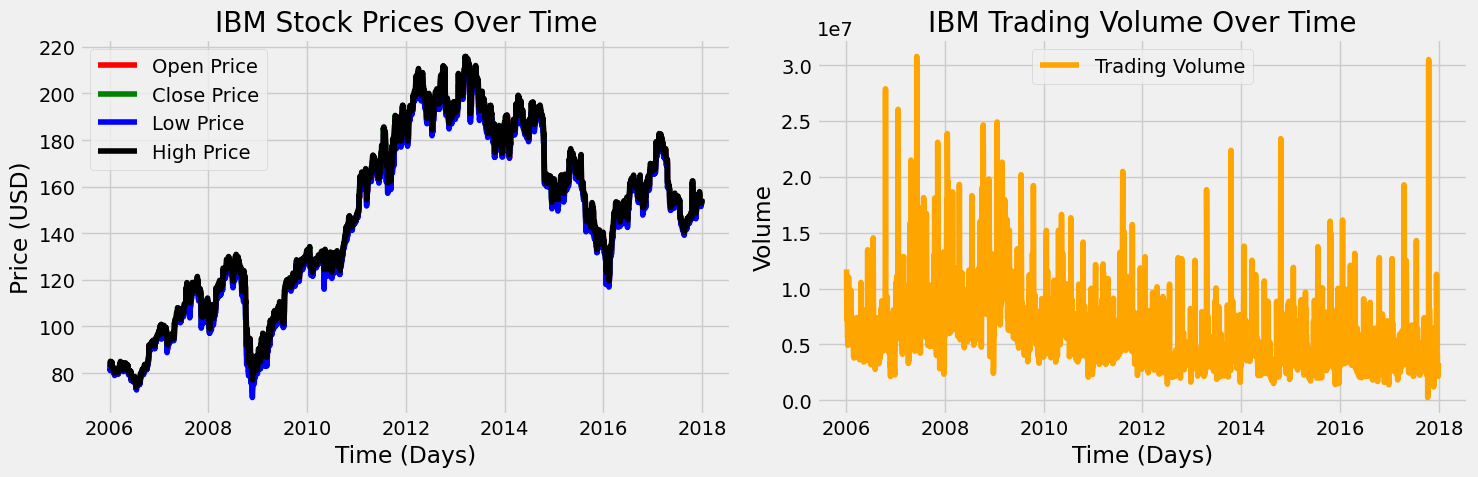

In [11]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(df['Open'], color='red', label='Open Price')
plt.plot(df['Close'], color='green', label='Close Price')
plt.plot(df['Low'], color='blue', label='Low Price')
plt.plot(df['High'], color='black', label='High Price')
plt.title('IBM Stock Prices Over Time')
plt.xlabel('Time (Days)')
plt.ylabel('Price (USD)')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(df['Volume'], color='orange', label='Trading Volume')
plt.title('IBM Trading Volume Over Time')
plt.xlabel('Time (Days)')
plt.ylabel('Volume')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [12]:
decomposition_result = seasonal_decompose(df['Close'], model='additive', period=365)

subplot_titles = ['Observed Prices', 'Trend Component', 'Seasonal Component', 'Residuals']

fig = sp.make_subplots(rows=4, cols=1, shared_xaxes=True, subplot_titles=subplot_titles)

fig.add_trace(go.Scatter(x=df.index, y=decomposition_result.observed, 
                         mode='lines', name='Observed Prices',
                         line=dict(color='blue', width=2)), row=1, col=1)

fig.add_trace(go.Scatter(x=df.index, y=decomposition_result.trend, 
                         mode='lines', name='Trend',
                         line=dict(color='orange', width=2)), row=2, col=1)

fig.add_trace(go.Scatter(x=df.index, y=decomposition_result.seasonal, 
                         mode='lines', name='Seasonal',
                         line=dict(color='green', width=2)), row=3, col=1)

fig.add_trace(go.Scatter(x=df.index, y=decomposition_result.resid, 
                         mode='lines', name='Residual',
                         line=dict(color='red', width=2)), row=4, col=1)

fig.update_layout(height=800, title='Decomposed Analysis of Closing Prices',
                  xaxis_title='Date', yaxis_title='Value', showlegend=True)

fig.show()

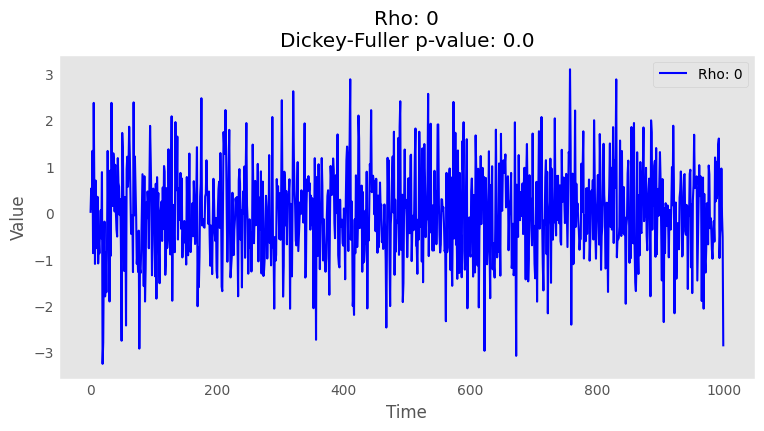

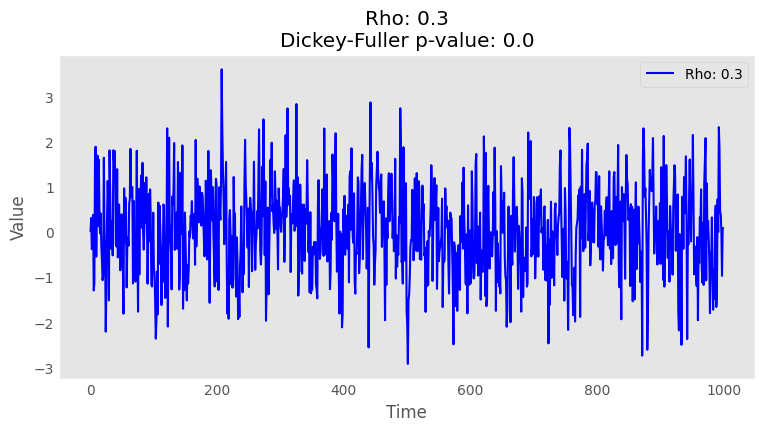

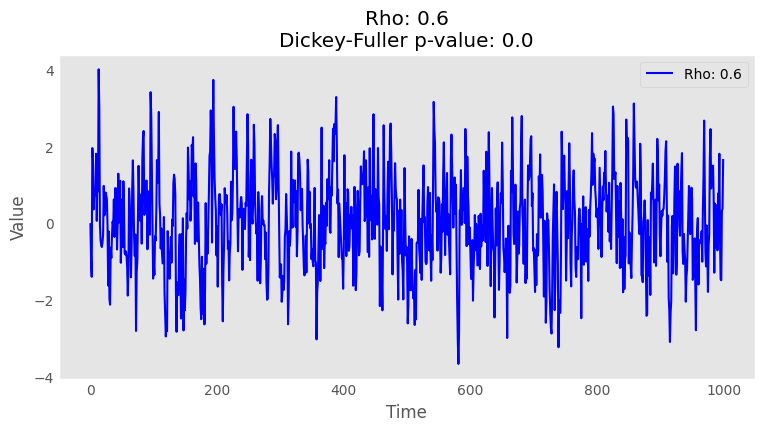

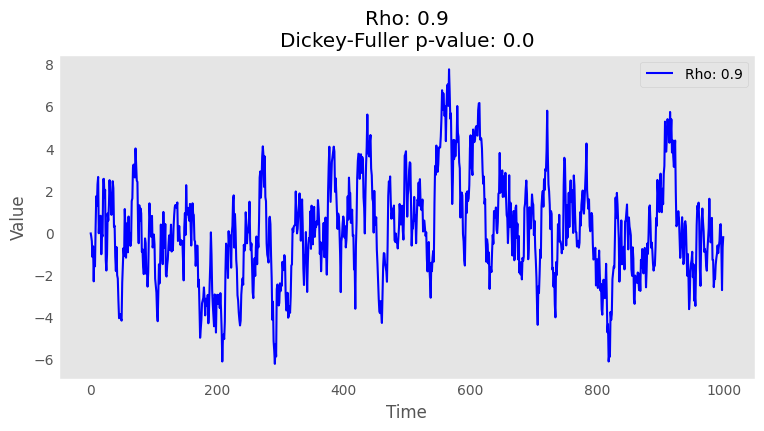

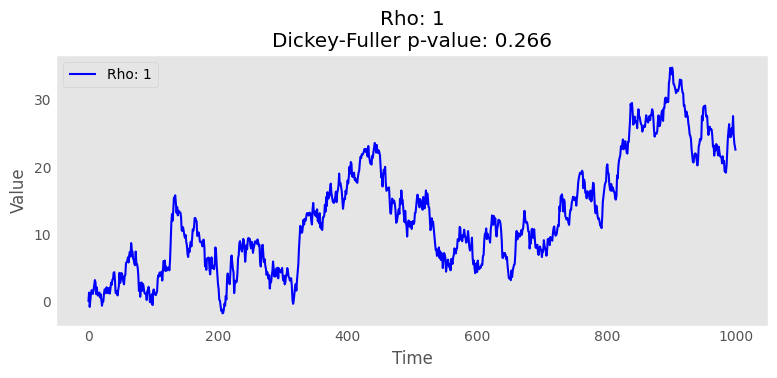

In [13]:
def plotProcess(n_samples=1000, rho=0): 
    w = np.random.normal(size=n_samples)
    x = np.zeros(n_samples)  
    
    for t in range(1, n_samples):  
        x[t] = rho * x[t-1] + w[t]

    with plt.style.context('ggplot'):  
        plt.figure(figsize=(8, 4)) 
        plt.plot(x, label=f"Rho: {rho}", linewidth=1.5, color='blue')  
        plt.title(f"Rho: {rho}\nDickey-Fuller p-value: {round(sm.tsa.stattools.adfuller(x)[1], 3)}")
        plt.xlabel("Time")
        plt.ylabel("Value")
        plt.legend()
        plt.grid()

for rho in [0, 0.3, 0.6, 0.9, 1]:
    plotProcess(rho=rho)

plt.tight_layout() 
plt.show()

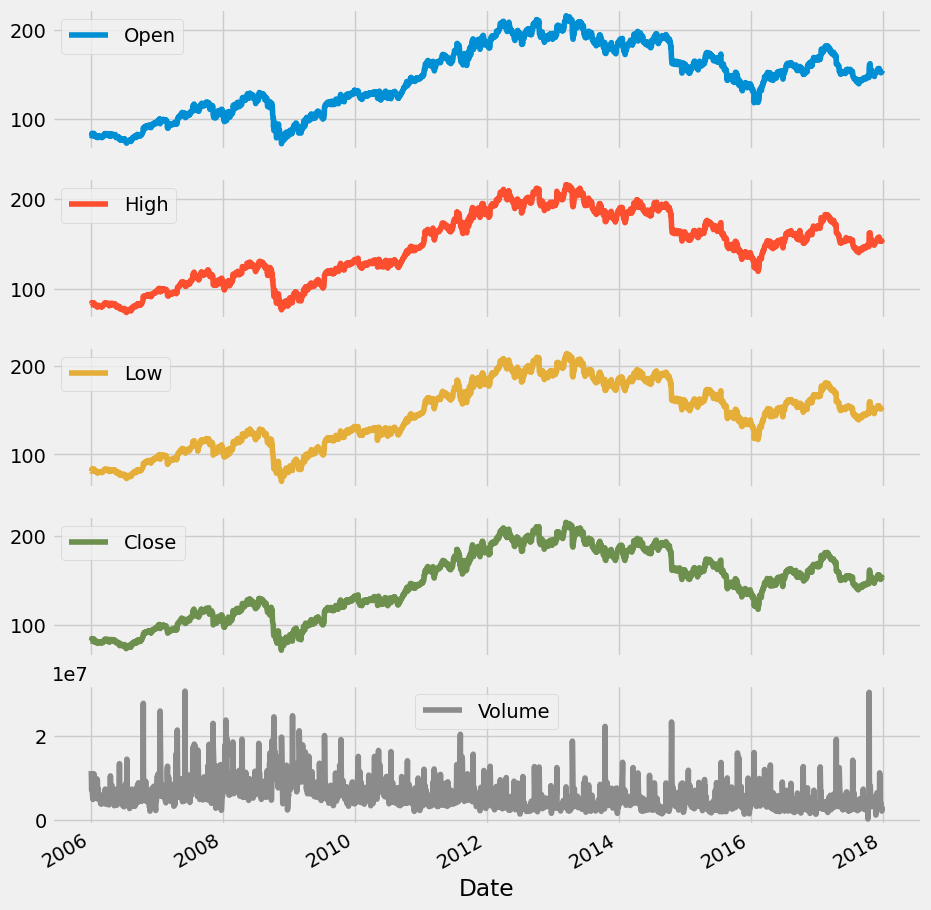

In [14]:
df.plot(subplots=True, figsize=(10,12))
plt.show()

# Data Preprocessing and Time Series Preparation for LSTM/GRU/RNN Models

In [15]:
df = df.drop(['Name'], axis=1)

In [16]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200
2006-01-04,82.20,82.50,81.33,81.95,9840600
2006-01-05,81.40,82.90,81.00,82.50,7213500
2006-01-06,83.95,85.03,83.41,84.95,8197400
2006-01-09,84.10,84.25,83.38,83.73,6858200


In [17]:
def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("the root mean squared error is : {}.".format(rmse))

In [18]:
train = df[:'2016'].iloc[:,1:2].values
test = df['2017':].iloc[:,1:2].values

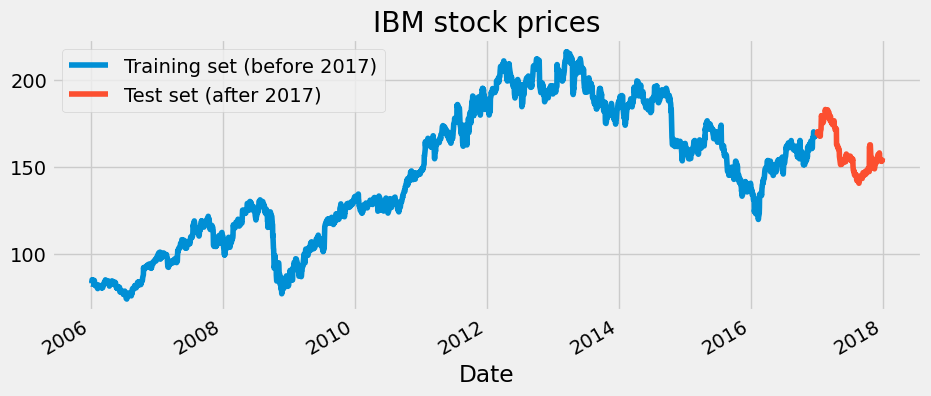

In [19]:
df["High"][:'2016'].plot(figsize=(10,4), legend=True)
df["High"]["2017":].plot(figsize=(10,4), legend=True)
plt.legend(["Training set (before 2017)", "Test set (after 2017)"])
plt.title("IBM stock prices")
plt.show()

In [20]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

In [21]:
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [22]:
time_step = 60
X_train, y_train = create_dataset(train_scaled, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [23]:
def prepare_and_predict(model, data, scaler, time_step):
    """
    Prepares the input data for the model and makes predictions.

    Parameters:
    model: The trained model (e.g., LSTM_model, RNN_model, etc.)
    data: The original data (Pandas DataFrame) to get the high prices from.
    scaler: The scaler used for normalization (MinMaxScaler).
    time_step: The number of time steps to consider for the LSTM/RNN model.

    Returns:
    predicted_prices: The predicted prices after inverse transformation.
    """
    inputs = data["High"][len(data) - len(test) - time_step:].values
    inputs = inputs.reshape(-1, 1)
    inputs = scaler.transform(inputs)

    X_test = []
    for i in range(time_step, len(inputs)):
        X_test.append(inputs[i-time_step:i, 0])
    
    X_test = np.array(X_test)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    predicted_prices = model.predict(X_test)
    predicted_prices = scaler.inverse_transform(predicted_prices)

    return predicted_prices

# Building and Evaluating the LSTM Model

In [24]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))  
LSTM_model.add(Dropout(0.3)) 
LSTM_model.add(LSTM(units=100, return_sequences=True))  
LSTM_model.add(Dropout(0.3))  
LSTM_model.add(LSTM(units=100, return_sequences=False))  
LSTM_model.add(Dropout(0.3))  
LSTM_model.add(Dense(units=1))

In [25]:
LSTM_model.compile(optimizer='adam', loss='mean_squared_error')

LSTM_model.fit(X_train, y_train, epochs=15, batch_size=32) 

Epoch 1/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0487
Epoch 2/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0039
Epoch 3/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0044
Epoch 4/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0036
Epoch 5/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0033
Epoch 6/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0035
Epoch 7/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0031
Epoch 8/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0034
Epoch 9/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0027
Epoch 10/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0026
Epoch 11/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0024
Epoch 12/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0026
Epoch 13/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0024
Epoch 14/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0022
Epoch 15/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0022


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


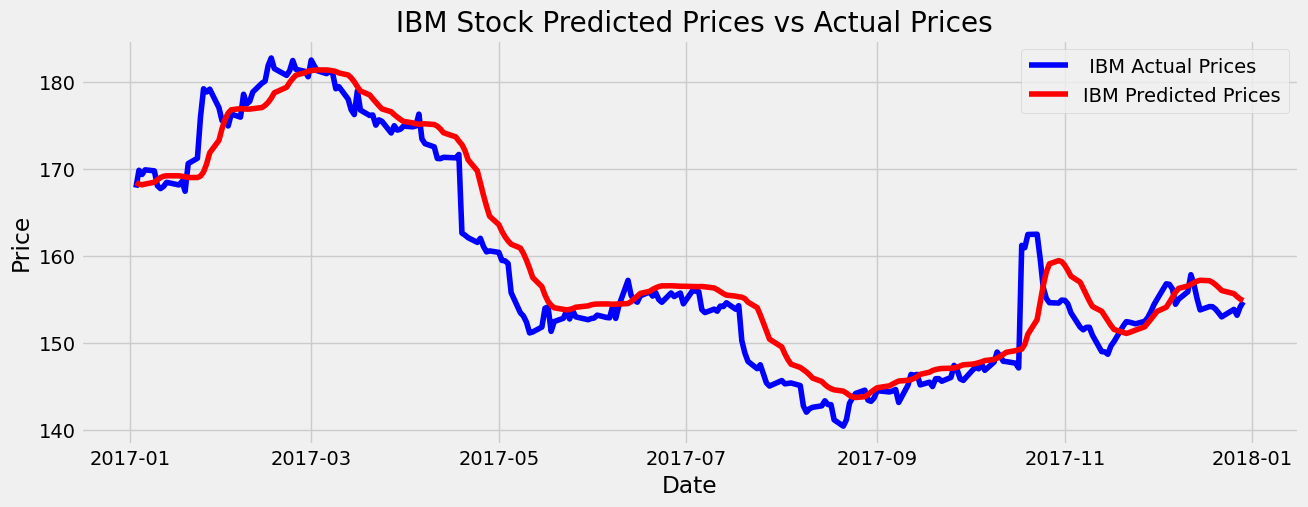

the root mean squared error is : 3.3482689112027075.


In [26]:
predicted_prices = prepare_and_predict(LSTM_model, df, scaler, time_step)

plt.figure(figsize=(14, 5))
plt.plot(df.loc['2017':].index, test, color='blue', label=' IBM Actual Prices')
plt.plot(df.loc['2017':].index, predicted_prices, color='red', label='IBM Predicted Prices')
plt.title(" IBM Stock Predicted Prices vs Actual Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

return_rmse(test, predicted_prices)

# Building and Evaluating the RNN Model

In [27]:
RNN_model = Sequential()
RNN_model.add(SimpleRNN(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1))) 
RNN_model.add(Dropout(0.3))  
RNN_model.add(SimpleRNN(units=100, return_sequences=True))  
RNN_model.add(Dropout(0.3))  
RNN_model.add(SimpleRNN(units=100, return_sequences=False)) 
RNN_model.add(Dropout(0.3))  
RNN_model.add(Dense(units=1))

In [28]:
RNN_model.compile(optimizer='adam', loss='mean_squared_error')

RNN_model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30


I0000 00:00:1729595010.243778     100 service.cc:145] XLA service 0x59684119e9a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729595010.243833     100 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729595010.243839     100 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 5/85 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.6602

I0000 00:00:1729595015.104831     100 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


85/85 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - loss: 0.3919
Epoch 2/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1011
Epoch 3/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0493
Epoch 4/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0340
Epoch 5/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0196
Epoch 6/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0179
Epoch 7/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0135
Epoch 8/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0110
Epoch 9/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0103
Epoch 10/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0085
Epoch 11/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0070
Epoch 12/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0057
Epoch 13/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0055
Epoch 14/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0048
Epoch 15/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0049
Epoch 16/30
85

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step


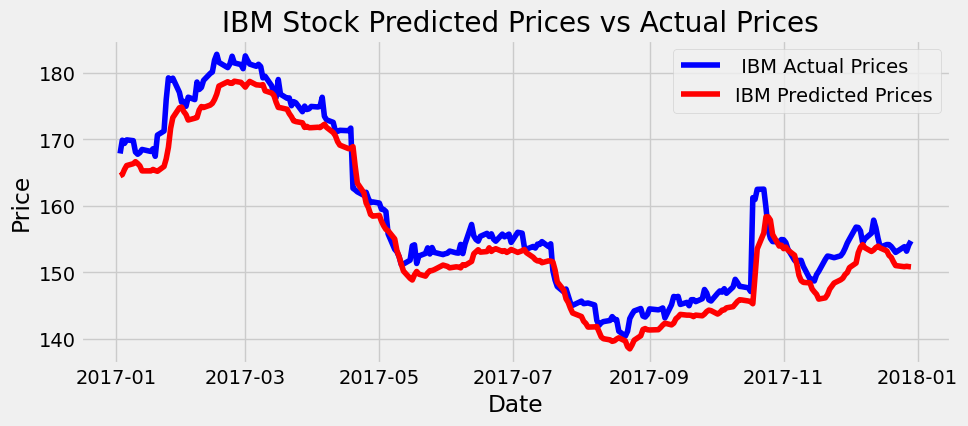

the root mean squared error is : 3.288169764949953.


In [29]:
predicted_prices = prepare_and_predict(RNN_model, df, scaler, time_step)

real_prices = df['2017':].iloc[:, 1:2].values  

plt.figure(figsize=(10, 4))
plt.plot(df.loc['2017':].index, test, color='blue', label=' IBM Actual Prices')
plt.plot(df.loc['2017':].index, predicted_prices, color='red', label='IBM Predicted Prices')
plt.title(" IBM Stock Predicted Prices vs Actual Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

plt.show()

return_rmse(test, predicted_prices)

# Building and Evaluating the GRU Model

In [30]:
def create_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(units=50, return_sequences=True, input_shape=input_shape, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=True, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=True, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    
    return model

GRU_model = create_gru_model((X_train.shape[1], 1))

In [33]:
GRU_model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=False), 
                  loss='mean_squared_error')

GRU_model.fit(X_train, y_train, epochs=15, batch_size=150)  

Epoch 1/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.1283
Epoch 2/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0344
Epoch 3/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0092
Epoch 4/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0046
Epoch 5/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0041
Epoch 6/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0042
Epoch 7/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0037
Epoch 8/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0034
Epoch 9/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0033
Epoch 10/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0036
Epoch 11/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0032
Epoch 12/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0031
Epoch 13/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0031
Epoch 14/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0030
Epoch 15/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0028


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


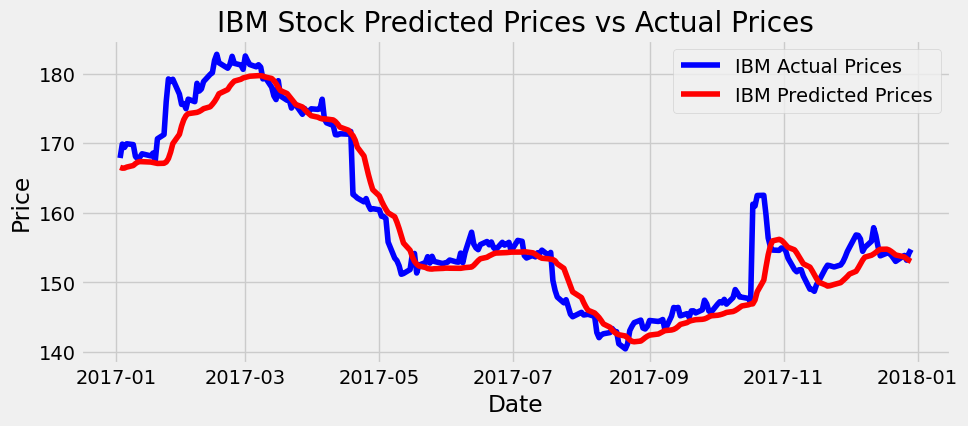

the root mean squared error is : 3.3082416101249117.


In [34]:
predicted_prices = prepare_and_predict(GRU_model, df, scaler, time_step)

real_prices = df['2017':].iloc[:, 1:2].values  

plt.figure(figsize=(10, 4))
plt.plot(df.loc['2017':].index, real_prices, color='blue', label='IBM Actual Prices')  
plt.plot(df.loc['2017':].index, predicted_prices, color='red', label='IBM Predicted Prices')  
plt.title("IBM Stock Predicted Prices vs Actual Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

return_rmse(test, predicted_prices)

# CONCLUSİON

In this notebook, we experimented with various time series models like LSTM, RNN, GRU, and Prophet to predict future stock prices based on historical data. A key realization from this work is that accurately forecasting future stock prices purely based on past data is difficult and often unrealistic. While these models are able to capture trends and seasonality from the historical data, they fall short in predicting sudden market shifts or trend reversals, which are frequent in financial markets.

For example, the models can easily pick up on patterns like a downtrend in stock prices, but without additional external information, such as market sentiment or correlated stock movements, they are unable to foresee a potential recovery or upward movement. The models we used simply follow the trends they’ve learned from the past, making it hard to predict unpredictable events such as price reversals.

This brings to light the importance of incorporating richer datasets, potentially including correlated stocks, news sentiment, or other external market factors. Although this project was primarily for practice with time series forecasting using models like LSTM, RNN, and GRU, it highlights the inherent limitations of relying solely on historical data for stock price prediction. Nonetheless, this notebook provided a valuable learning experience in working with these advanced machine learning models for time series analysis.

In [ ]:
## THANK YOUUU